# Почему Логистическая регрессия - линейная модель

In [3]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

import os 

exec_str = os.getcwd()[:os.getcwd().find('prog/')+len('prog/')]
from sys import path

if not exec_str in path:
    path.append(exec_str)
    print('exec added to path')

from DS_common import visualisations

# объем генерируемого набора данных
n = 200
# функция указывает правило дикриминации
dicr_fun = lambda x1, x2: x1 - x2 > 0.4
exec_str

exec added to path


'/home/dranik/KFA/university/diplom_project/prog/'

# Подготовительный этап

## Сренерируем входной набор данных
Массив дву-размерных точек, разделенный на две группы по некоторому линейному правилу

X1 = np.random.rand(n).reshape(n,1)
X2 = np.random.rand(n).reshape(n,1)
Y = dicr_fun(X1, X2).reshape(n,1)

В целом полученный массив меня устравивает, потому отложу его в файл

np.savetxt('2dim_data_for_logit.csv', np.concatenate([X1,X2,Y], axis = 1), delimiter=',')#.savetxt('2dim_data_for_logit.csv', sep = ',')


Загрузим полученный файл

In [4]:
arr = np.genfromtxt("2dim_data_for_logit.csv", delimiter=",")
X1, X2, Y = list(map(lambda x: x.reshape(n,1), arr.T))
Y = Y.astype('bool').reshape((n,))

## Нужна сигмоид функция

In [5]:
sim_fun = lambda x: 1/(1+np.exp(-x))

## Диaграмма рассеяния с цветом распределяющим по классам

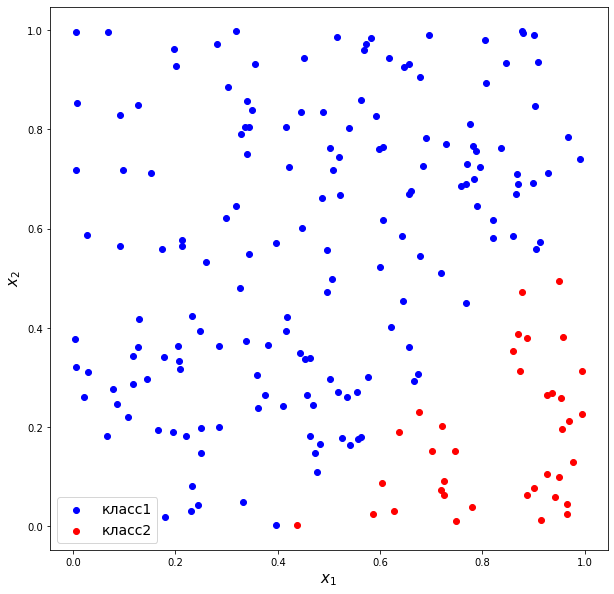

In [6]:
plt.figure(figsize = [10,10])

plt.scatter(X1[np.invert(Y)], X2[np.invert(Y)], color = 'blue')
plt.scatter(X1[Y], X2[Y], color = 'red')

plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(['класс1', 'класс2'], fontsize = 14)

X = np.concatenate([X1,X2], axis = 1)
plt.savefig('pictures/scatter_2d_classes.png')

# Покажем как работает Logit для данного случая

## Строим модель на данных

In [7]:
model = LogisticRegression().fit(X, Y)

model.predict_proba(X[Y])

array([[0.60058045, 0.39941955],
       [0.57644203, 0.42355797],
       [0.33862162, 0.66137838],
       [0.2031884 , 0.7968116 ],
       [0.57248079, 0.42751921],
       [0.26703138, 0.73296862],
       [0.28762453, 0.71237547],
       [0.24264165, 0.75735835],
       [0.4319413 , 0.5680587 ],
       [0.45972446, 0.54027554],
       [0.35822842, 0.64177158],
       [0.56927961, 0.43072039],
       [0.52467079, 0.47532921],
       [0.63741066, 0.36258934],
       [0.65223409, 0.34776591],
       [0.21642387, 0.78357613],
       [0.63593419, 0.36406581],
       [0.49646189, 0.50353811],
       [0.36225891, 0.63774109],
       [0.66714312, 0.33285688],
       [0.57629999, 0.42370001],
       [0.42863035, 0.57136965],
       [0.34016513, 0.65983487],
       [0.49620493, 0.50379507],
       [0.5094885 , 0.4905115 ],
       [0.40683521, 0.59316479],
       [0.44724345, 0.55275655],
       [0.53980771, 0.46019229],
       [0.53109196, 0.46890804],
       [0.62043548, 0.37956452],
       [0.

## Нанесем двумерную сигмоиду

In [21]:
from plotly.subplots import make_subplots

x1 = np.linspace(-0.5, 1.5, 50)
x2 = np.linspace(-0.5, 1.5, 50)

x1, x2 = np.meshgrid(x1,x2)
pp = sim_fun(x1*model.coef_[0,0] + x2*model.coef_[0,1] + model.intercept_[0])

i_ind, j_ind, k_ind = visualisations.get_meshtraces(x1)

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "mesh3d"}, {"type": "mesh3d"}]]
)

fig.append_trace(
    go.Scatter3d(
        x = X1[Y].flatten(),
        y = X2[Y].flatten(),
        z = model.predict_proba(X[Y, :])[:,1].flatten(),
        marker = {'size':5, 'color':'red'},
        name = 'класс1',
        mode = 'markers'
    ),
    row = 1,col = 1
)

fig.append_trace(
    go.Scatter3d(
        x = X1[np.invert(Y)].flatten(),
        y = X2[np.invert(Y)].flatten(),
        z = model.predict_proba(X[np.invert(Y), :])[:,1].flatten(),
        marker = {'size':5, 'color':'#0000ff'},
        name = 'класс2',
        mode = 'markers',
    ),
    row = 1,col = 1
)

fig.append_trace(
    go.Mesh3d(    
        x=x1.ravel(),
        y=x2.ravel(),
        z=pp.ravel(),
        opacity=0.5, color='gray',
        colorbar_thickness=25, 
        flatshading=True,
        showlegend = True,
        name = 'сигмоида',
        i = i_ind, j = j_ind, k = k_ind
    ),
    row = 1,col = 1
)


fig.append_trace(
    go.Scatter3d(
        x = X1[Y].flatten(),
        y = X2[Y].flatten(),
        z = model.predict_proba(X[Y, :])[:,1].flatten(),
        marker = {'size':5, 'color':'red'},
        mode = 'markers',
        showlegend = False
    ),
    row = 1,col = 2
)

fig.append_trace(
    go.Scatter3d(
        x = X1[np.invert(Y)].flatten(),
        y = X2[np.invert(Y)].flatten(),
        z = model.predict_proba(X[np.invert(Y), :])[:,1].flatten(),
        marker = {'size':5, 'color':'#0000ff'},
        mode = 'markers',
        showlegend = False
    ),
    row = 1,col = 2
)

fig.append_trace(
    go.Mesh3d(    
        x=x1.ravel(),
        y=x2.ravel(),
        z=pp.ravel(),
        opacity=0.5, color='gray',
        colorbar_thickness=25, 
        flatshading=True,
        i = i_ind, j = j_ind, k = k_ind
    ),
    row = 1,col = 2
)


fig.update_layout(
    height=750, width=1500
)

fig.layout.scene1.camera.eye=dict(x=1.7, y=1.7, z=1.7) 
fig.layout.scene2.camera.eye=dict(x=-1.7, y=-1.7, z=0.5) 

fig.layout.scene1.xaxis=dict(title_text = "x", titlefont = {'size':20}) 
fig.layout.scene2.xaxis=dict(title_text = "x", titlefont = {'size':20})
fig.layout.scene1.yaxis=dict(title_text = "x", titlefont = {'size':20}) 
fig.layout.scene2.yaxis=dict(title_text = "x", titlefont = {'size':20})
fig.layout.scene1.zaxis=dict(title_text = "p", titlefont = {'size':20}) 
fig.layout.scene2.zaxis=dict(title_text = "p", titlefont = {'size':20})

fig.update_layout(    
    legend=dict(
        font=dict(
            family="Courier",
            size=20,
            color="black",
        )
    )
)

fig.show()
fig.write_image('pictures/scatter3d_with_sigmoid.png')